In [361]:
# IMPORT LIBRARIES
import pandas as pd, numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier

In [362]:
Inputs = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

In [363]:
# LOAD CSV FILE
df_train = pd.read_csv('train.csv')
print ('Loaded',len(df_train),'rows of TRAIN.CSV')
df_train

Loaded 891 rows of TRAIN.CSV


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [364]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [365]:
title = pd.DataFrame()
title[ 'Title' ] = df_train[ 'Name' ].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )
title_one = title[ 'Title' ]

# a map of more aggregated titles
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }

# we map each title
title[ 'Title' ] = title.Title.map( Title_Dictionary )

#title = pd.concat( [ title , titles_dummies ] , axis = 1 )
title = pd.get_dummies( title.Title )
title.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [366]:
ticket_one = pd.DataFrame()
ticket_one ['ticket'] = full[ 'Ticket' ].map( lambda name: name.split( ' ' )[0].strip() )

count = 0
for x in ticket_one['ticket'] :
 if x.isdigit() == True :
    ticket_one['ticket'][count]="simple"
 count =  count +1

ticket_one.head()

,ticket
0,A/5
1,PC
2,STON/O2.
3,simple
4,simple


In [367]:
family = pd.DataFrame()
family['FamilySize'] = df_train['SibSp'] + df_train['Parch']
family.head()

,FamilySize
0,1
1,1
2,0
3,1
4,0


In [368]:
df_train = df_train[ ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'] ]
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [369]:
df_train = pd.concat( [df_train,title_one, family ], axis=1  )
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,Mr,1
1,1,1,female,38.0,1,0,71.2833,C,Mrs,1
2,1,3,female,26.0,0,0,7.9250,S,Miss,0
3,1,1,female,35.0,1,0,53.1000,S,Mrs,1
4,0,3,male,35.0,0,0,8.0500,S,Mr,0


In [370]:
df_train = df_train.dropna()
print ('Loaded',len(df_train),'rows of TRAIN.CSV')

Loaded 712 rows of TRAIN.CSV


In [371]:
Data_Y = df_train['Survived']
Data_X =  df_train.drop(['Survived'], axis=1)

In [372]:
print(Data_X.shape)
Data_X.head()

(712, 9)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,3,male,22.0,1,0,7.2500,S,Mr,1
1,1,female,38.0,1,0,71.2833,C,Mrs,1
2,3,female,26.0,0,0,7.9250,S,Miss,0
3,1,female,35.0,1,0,53.1000,S,Mrs,1
4,3,male,35.0,0,0,8.0500,S,Mr,0


In [373]:
labEnc_Sex = preprocessing.LabelEncoder()
labEnc_Embarked = preprocessing.LabelEncoder()
labEnc_Title = preprocessing.LabelEncoder()

labEnc_Sex.fit(Data_X.Sex.values)
Data_X['Sex'] = labEnc_Sex.transform(Data_X.Sex.values)

labEnc_Embarked.fit(Data_X.Embarked.values.astype(str))
Data_X['Embarked'] = labEnc_Embarked.transform(Data_X.Embarked.values.astype(str))

labEnc_Title.fit(Data_X.Title.values.astype(str))
Data_X['Title'] = labEnc_Title.transform(Data_X.Title.values.astype(str))

Data_X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,3,1,22.0,1,0,7.2500,2,2,1
1,1,0,38.0,1,0,71.2833,0,3,1
2,3,0,26.0,0,0,7.9250,2,1,0
3,1,0,35.0,1,0,53.1000,2,3,1
4,3,1,35.0,0,0,8.0500,2,2,0


In [375]:
Data_X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,3,1,22.0,1,0,7.2500,2,2,1
1,1,0,38.0,1,0,71.2833,0,3,1
2,3,0,26.0,0,0,7.9250,2,1,0
3,1,0,35.0,1,0,53.1000,2,3,1
4,3,1,35.0,0,0,8.0500,2,2,0


In [376]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.callbacks import LearningRateScheduler
from keras.optimizers import Adam, Adamax

#SPLIT TRAIN AND VALIDATION SET
X_train, X_val, Y_train, Y_val = train_test_split(Data_X, Data_Y, test_size = 0.3)

In [377]:
# Create function returning a compiled network
def create_network():
    
    # Start neural network
    model = Sequential()
    model.add(Dense(18,input_dim=9))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Activation('relu'))


    model.add(Dense(10))
    #model.add(Dropout(0.4))
    model.add(BatchNormalization())
    model.add(Activation('selu'))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.001), loss="binary_crossentropy", metrics=["accuracy"])
    
    # Return compiled network
    return model

In [378]:
history = create_network().fit(X_train,Y_train, batch_size=100, epochs = 300, validation_data = (X_val,Y_val))

Train on 498 samples, validate on 214 samples
Epoch 1/300
498/498 [==============================] - 33s 66ms/step - loss: 0.8830 - acc: 0.5141 - val_loss: 0.7720 - val_acc: 0.4159
Epoch 2/300
498/498 [==============================] - 0s 190us/step - loss: 0.8209 - acc: 0.5442 - val_loss: 0.7428 - val_acc: 0.4439
Epoch 3/300
498/498 [==============================] - 0s 192us/step - loss: 0.8085 - acc: 0.5442 - val_loss: 0.7306 - val_acc: 0.4673
Epoch 4/300
498/498 [==============================] - 0s 188us/step - loss: 0.7995 - acc: 0.5622 - val_loss: 0.7204 - val_acc: 0.4907
Epoch 5/300
498/498 [==============================] - 0s 255us/step - loss: 0.7549 - acc: 0.5602 - val_loss: 0.7140 - val_acc: 0.5140
Epoch 6/300
498/498 [==============================] - 0s 205us/step - loss: 0.7475 - acc: 0.5743 - val_loss: 0.7047 - val_acc: 0.5234
Epoch 7/300
498/498 [==============================] - 0s 183us/step - loss: 0.7546 - acc: 0.5924 - val_loss: 0.6939 - val_acc: 0.5374
Epoch 8/3

Epoch 61/300
498/498 [==============================] - 0s 232us/step - loss: 0.5687 - acc: 0.7149 - val_loss: 0.5821 - val_acc: 0.6963
Epoch 62/300
498/498 [==============================] - 0s 212us/step - loss: 0.5675 - acc: 0.7329 - val_loss: 0.5817 - val_acc: 0.6963
Epoch 63/300
498/498 [==============================] - 0s 197us/step - loss: 0.5542 - acc: 0.7169 - val_loss: 0.5827 - val_acc: 0.6916
Epoch 64/300
498/498 [==============================] - 0s 192us/step - loss: 0.5581 - acc: 0.7249 - val_loss: 0.5829 - val_acc: 0.6869
Epoch 65/300
498/498 [==============================] - 0s 193us/step - loss: 0.5756 - acc: 0.7068 - val_loss: 0.5797 - val_acc: 0.6869
Epoch 66/300
498/498 [==============================] - 0s 190us/step - loss: 0.5503 - acc: 0.7209 - val_loss: 0.5785 - val_acc: 0.7009
Epoch 67/300
498/498 [==============================] - 0s 235us/step - loss: 0.5634 - acc: 0.7169 - val_loss: 0.5765 - val_acc: 0.7056
Epoch 68/300
498/498 [==========================

498/498 [==============================] - 0s 471us/step - loss: 0.5125 - acc: 0.7470 - val_loss: 0.5664 - val_acc: 0.7290
Epoch 122/300
498/498 [==============================] - 0s 445us/step - loss: 0.5393 - acc: 0.7450 - val_loss: 0.5616 - val_acc: 0.7336
Epoch 123/300
498/498 [==============================] - 0s 340us/step - loss: 0.5392 - acc: 0.7450 - val_loss: 0.5634 - val_acc: 0.7336
Epoch 124/300
498/498 [==============================] - 0s 320us/step - loss: 0.5255 - acc: 0.7309 - val_loss: 0.5641 - val_acc: 0.7243
Epoch 125/300
498/498 [==============================] - 0s 260us/step - loss: 0.5430 - acc: 0.7309 - val_loss: 0.5616 - val_acc: 0.7243
Epoch 126/300
498/498 [==============================] - 0s 204us/step - loss: 0.5422 - acc: 0.7490 - val_loss: 0.5663 - val_acc: 0.7523
Epoch 127/300
498/498 [==============================] - 0s 204us/step - loss: 0.5328 - acc: 0.7309 - val_loss: 0.5667 - val_acc: 0.7570
Epoch 128/300
498/498 [==============================] 

Epoch 181/300
498/498 [==============================] - 0s 194us/step - loss: 0.5016 - acc: 0.7811 - val_loss: 0.5458 - val_acc: 0.7430
Epoch 182/300
498/498 [==============================] - 0s 186us/step - loss: 0.5150 - acc: 0.7430 - val_loss: 0.5438 - val_acc: 0.7477
Epoch 183/300
498/498 [==============================] - 0s 200us/step - loss: 0.5223 - acc: 0.7651 - val_loss: 0.5419 - val_acc: 0.7477
Epoch 184/300
498/498 [==============================] - 0s 192us/step - loss: 0.5199 - acc: 0.7731 - val_loss: 0.5420 - val_acc: 0.7477
Epoch 185/300
498/498 [==============================] - 0s 186us/step - loss: 0.5307 - acc: 0.7590 - val_loss: 0.5330 - val_acc: 0.7430
Epoch 186/300
498/498 [==============================] - 0s 206us/step - loss: 0.4944 - acc: 0.7691 - val_loss: 0.5230 - val_acc: 0.7430
Epoch 187/300
498/498 [==============================] - 0s 204us/step - loss: 0.5324 - acc: 0.7711 - val_loss: 0.5307 - val_acc: 0.7477
Epoch 188/300
498/498 [==================

Epoch 241/300
498/498 [==============================] - 0s 168us/step - loss: 0.4932 - acc: 0.7731 - val_loss: 0.5026 - val_acc: 0.7757
Epoch 242/300
498/498 [==============================] - 0s 194us/step - loss: 0.4888 - acc: 0.7851 - val_loss: 0.5079 - val_acc: 0.7710
Epoch 243/300
498/498 [==============================] - 0s 194us/step - loss: 0.4836 - acc: 0.7972 - val_loss: 0.5086 - val_acc: 0.7710
Epoch 244/300
498/498 [==============================] - 0s 176us/step - loss: 0.5035 - acc: 0.7590 - val_loss: 0.5069 - val_acc: 0.7757
Epoch 245/300
498/498 [==============================] - 0s 186us/step - loss: 0.4816 - acc: 0.7932 - val_loss: 0.4975 - val_acc: 0.7944
Epoch 246/300
498/498 [==============================] - 0s 192us/step - loss: 0.4943 - acc: 0.7731 - val_loss: 0.4996 - val_acc: 0.7897
Epoch 247/300
498/498 [==============================] - 0s 234us/step - loss: 0.5038 - acc: 0.7711 - val_loss: 0.5028 - val_acc: 0.7850
Epoch 248/300
498/498 [==================

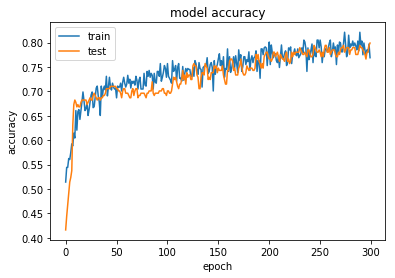

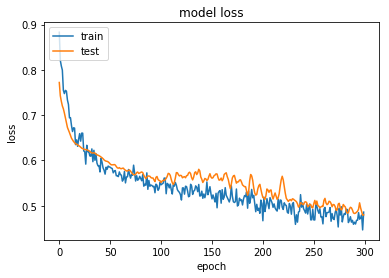

In [379]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [203]:
# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network, epochs=300,batch_size=100,verbose=0)

In [204]:
# Evaluate neural network using three-fold cross-validation
CrossValScore = cross_val_score(neural_network, Data_X, Data_Y, cv=10)

In [205]:
print (CrossValScore)
print( np.mean(CrossValScore) )

[0.75       0.79166669 0.74647886 0.81690139 0.78873241 0.77464789
 0.78873241 0.78873241 0.78873241 0.84507042]
0.7879694879055024


In [380]:
df_test = pd.read_csv('test.csv')
print ('Loaded',len(df_test),'rows of TEST.CSV')
df_test.head()

Loaded 418 rows of TEST.CSV


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [381]:
title = pd.DataFrame()
title[ 'Title' ] = df_test[ 'Name' ].map( lambda name: name.split( ',' )[1].split( '.' )[0].strip() )
title_one = title[ 'Title' ]
title.head()

,Title
0,Mr
1,Mrs
2,Mr
3,Mr
4,Mrs


In [382]:
family = pd.DataFrame()
family['FamilySize'] = df_test['SibSp'] + df_test['Parch']
family.head()

,FamilySize
0,0
1,1
2,0
3,0
4,2


In [383]:
df_test = df_test[ ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'] ]
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [384]:
df_test = pd.concat( [df_test,title_one, family ], axis=1  )
df_test.fillna("a")
df_test.shape

(418, 9)

In [385]:
Data_X = df_test
Data_X.to_csv("test_processed.csv", sep=',')

In [386]:
Data_X['Sex'] = Data_X['Sex'].map(lambda s: '<unknown>' if s not in labEnc_Sex.classes_ else s)
labEnc_Sex.classes_ = np.append(labEnc_Sex.classes_, '<unknown>')

Data_X['Embarked'] = Data_X['Embarked'].map(lambda s: '<unknown>' if s not in labEnc_Embarked.classes_ else s)
labEnc_Embarked.classes_ = np.append(labEnc_Embarked.classes_, '<unknown>')

Data_X['Title'] = Data_X['Title'].map(lambda s: '<unknown>' if s not in labEnc_Title.classes_ else s)
labEnc_Title.classes_ = np.append(labEnc_Title.classes_, '<unknown>')

Data_X['Sex'] = labEnc_Sex.transform(Data_X.Sex.values)
Data_X['Embarked'] = labEnc_Embarked.transform(Data_X.Embarked.values.astype(str))
Data_X['Title'] = labEnc_Title.transform(Data_X.Title.values.astype(str))

Data_X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,3,1,34.5,0,0,7.8292,1,2,0
1,3,0,47.0,1,0,7.0000,2,3,1
2,2,1,62.0,0,0,9.6875,1,2,0
3,3,1,27.0,0,0,8.6625,2,2,0
4,3,0,22.0,1,1,12.2875,2,3,2


In [400]:
# Start neural network
model = Sequential()
model.add(Dense(18,input_dim=9))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Dense(10))
#model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Activation('selu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.001), loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_train,Y_train, batch_size=100, epochs = 300, validation_data = (X_val,Y_val))

Train on 498 samples, validate on 214 samples
Epoch 1/300
498/498 [==============================] - 20s 40ms/step - loss: 0.7549 - acc: 0.5663 - val_loss: 0.6847 - val_acc: 0.5467
Epoch 2/300
498/498 [==============================] - 0s 156us/step - loss: 0.7289 - acc: 0.5643 - val_loss: 0.6797 - val_acc: 0.5561
Epoch 3/300
498/498 [==============================] - 0s 160us/step - loss: 0.6885 - acc: 0.6084 - val_loss: 0.6734 - val_acc: 0.5701
Epoch 4/300
498/498 [==============================] - 0s 168us/step - loss: 0.6608 - acc: 0.6546 - val_loss: 0.6646 - val_acc: 0.5701
Epoch 5/300
498/498 [==============================] - 0s 164us/step - loss: 0.6769 - acc: 0.6064 - val_loss: 0.6574 - val_acc: 0.5888
Epoch 6/300
498/498 [==============================] - 0s 156us/step - loss: 0.6791 - acc: 0.6245 - val_loss: 0.6503 - val_acc: 0.6075
Epoch 7/300
498/498 [==============================] - 0s 158us/step - loss: 0.6743 - acc: 0.6124 - val_loss: 0.6447 - val_acc: 0.6262
Epoch 8/3

Epoch 61/300
498/498 [==============================] - 0s 154us/step - loss: 0.5916 - acc: 0.6827 - val_loss: 0.5844 - val_acc: 0.7103
Epoch 62/300
498/498 [==============================] - 0s 180us/step - loss: 0.5911 - acc: 0.6968 - val_loss: 0.5844 - val_acc: 0.7150
Epoch 63/300
498/498 [==============================] - 0s 180us/step - loss: 0.5930 - acc: 0.6827 - val_loss: 0.5843 - val_acc: 0.7103
Epoch 64/300
498/498 [==============================] - 0s 188us/step - loss: 0.5758 - acc: 0.6908 - val_loss: 0.5837 - val_acc: 0.7103
Epoch 65/300
498/498 [==============================] - 0s 168us/step - loss: 0.5904 - acc: 0.6888 - val_loss: 0.5823 - val_acc: 0.7056
Epoch 66/300
498/498 [==============================] - 0s 172us/step - loss: 0.5896 - acc: 0.6948 - val_loss: 0.5811 - val_acc: 0.7056
Epoch 67/300
498/498 [==============================] - 0s 174us/step - loss: 0.5923 - acc: 0.7068 - val_loss: 0.5807 - val_acc: 0.7056
Epoch 68/300
498/498 [==========================

498/498 [==============================] - 0s 200us/step - loss: 0.5637 - acc: 0.7108 - val_loss: 0.5657 - val_acc: 0.7103
Epoch 122/300
498/498 [==============================] - 0s 200us/step - loss: 0.5262 - acc: 0.7470 - val_loss: 0.5626 - val_acc: 0.7103
Epoch 123/300
498/498 [==============================] - 0s 180us/step - loss: 0.5412 - acc: 0.7088 - val_loss: 0.5557 - val_acc: 0.7243
Epoch 124/300
498/498 [==============================] - 0s 172us/step - loss: 0.5291 - acc: 0.7550 - val_loss: 0.5508 - val_acc: 0.7336
Epoch 125/300
498/498 [==============================] - 0s 194us/step - loss: 0.5223 - acc: 0.7550 - val_loss: 0.5489 - val_acc: 0.7290
Epoch 126/300
498/498 [==============================] - 0s 164us/step - loss: 0.5246 - acc: 0.7530 - val_loss: 0.5464 - val_acc: 0.7290
Epoch 127/300
498/498 [==============================] - 0s 164us/step - loss: 0.5435 - acc: 0.7550 - val_loss: 0.5447 - val_acc: 0.7243
Epoch 128/300
498/498 [==============================] 

Epoch 181/300
498/498 [==============================] - 0s 160us/step - loss: 0.4932 - acc: 0.7590 - val_loss: 0.4939 - val_acc: 0.7617
Epoch 182/300
498/498 [==============================] - 0s 160us/step - loss: 0.5243 - acc: 0.7450 - val_loss: 0.4958 - val_acc: 0.7617
Epoch 183/300
498/498 [==============================] - 0s 162us/step - loss: 0.5194 - acc: 0.7510 - val_loss: 0.4985 - val_acc: 0.7570
Epoch 184/300
498/498 [==============================] - 0s 159us/step - loss: 0.5073 - acc: 0.7490 - val_loss: 0.5034 - val_acc: 0.7570
Epoch 185/300
498/498 [==============================] - 0s 162us/step - loss: 0.5084 - acc: 0.7490 - val_loss: 0.5117 - val_acc: 0.7523
Epoch 186/300
498/498 [==============================] - 0s 170us/step - loss: 0.5105 - acc: 0.7691 - val_loss: 0.5175 - val_acc: 0.7430
Epoch 187/300
498/498 [==============================] - 0s 162us/step - loss: 0.5064 - acc: 0.7610 - val_loss: 0.5116 - val_acc: 0.7477
Epoch 188/300
498/498 [==================

Epoch 241/300
498/498 [==============================] - 0s 176us/step - loss: 0.4797 - acc: 0.7671 - val_loss: 0.4878 - val_acc: 0.7710
Epoch 242/300
498/498 [==============================] - 0s 188us/step - loss: 0.4811 - acc: 0.7691 - val_loss: 0.4879 - val_acc: 0.7664
Epoch 243/300
498/498 [==============================] - 0s 186us/step - loss: 0.4760 - acc: 0.7831 - val_loss: 0.4869 - val_acc: 0.7664
Epoch 244/300
498/498 [==============================] - 0s 174us/step - loss: 0.4939 - acc: 0.7590 - val_loss: 0.4858 - val_acc: 0.7617
Epoch 245/300
498/498 [==============================] - 0s 182us/step - loss: 0.5187 - acc: 0.7711 - val_loss: 0.4895 - val_acc: 0.7617
Epoch 246/300
498/498 [==============================] - 0s 186us/step - loss: 0.5072 - acc: 0.7631 - val_loss: 0.4905 - val_acc: 0.7664
Epoch 247/300
498/498 [==============================] - 0s 182us/step - loss: 0.4751 - acc: 0.7871 - val_loss: 0.4857 - val_acc: 0.7664
Epoch 248/300
498/498 [==================

In [401]:
pred_Y = model.predict(Data_X)

In [406]:
type(pred_Y)

numpy.ndarray

In [402]:
count = 0
for x in pred_Y:
    if x > .5 :
        pred_Y[count] = 1
    else:
       pred_Y[count] = 0
    count = count + 1
     

C:\Users\Ramvinojen\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


In [407]:
df = pd.DataFrame({'output':pred_Y[:,0]})
df.to_csv("test_y.csv", sep=',')